# Unit 5: Spectral Properties and Quadratic Forms

In this unit:
1. Eigenvalues and eigenvectors
1. Diagnolization and similartiy transform
1. Matrix powers and modes
1. Spectral properties of symmetric matrices
1. Quadratic forms
1. Positive definite (semi-definite) matrices
1. Hessians and convexity

We are now dealing with square matrices $A \in {\mathbb R}^{n \times n}$.

A vector $x \neq 0$ is an eigenvector of $A$ corresponding to a scalar eigenvalue $\lambda$ if
$$
A x = \lambda x
$$

In [1]:
using LinearAlgebra
A = [1 2 ;
    3 4]
λ1, λ2 = eigvals(A)

2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014

In [2]:
ev = eigvecs(A)
v1, v2 = ev[:,1], ev[:,2]
norm(A*v1 - λ1*v1), norm(A*v2 - λ2*v2)

(5.551115123125783e-17, 4.440892098500626e-16)

In [3]:
A*v1

2-element Vector{Float64}:
  0.3069700898055908
 -0.2106246605212121

In [4]:
λ1*v1

2-element Vector{Float64}:
  0.3069700898055908
 -0.21062466052121215

Eigenvectors are not unique

In [5]:
otherV1 = 2.6*v1
norm(A*otherV1 - λ1*otherV1)

4.965068306494546e-16

In [6]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014
vectors:
2×2 Matrix{Float64}:
 -0.824565  -0.415974
  0.565767  -0.909377

#### Finding the eigenvalues and eigenvectors

$$
A x = \lambda x
$$

$$
A x = \lambda I x
$$

$$
(A  - \lambda I) x = 0 
$$

Now if $\lambda$ is an eigenvalue corresponding to an eigenvector $x$, since we can't have $x=0$, we must have that the matrix $A- \lambda I$ is singular. Hence,

$$
\det(A - \lambda I) = 0
$$

Now notice that $\det(A - \lambda I)$ is an $n$th degree polynomial in $\lambda$. Hence we have $n$ eigenvalues.

Back to the example,
$$
A = \left[\begin{matrix}
1 & 2 \\
3 & 4 
\end{matrix}\right].
$$

$$
\det(A - \lambda I) = \left| \begin{matrix}
1-\lambda & 2 \\
3 & 4-\lambda
\end{matrix}\right| = (1-\lambda)(4-\lambda) - 6 =4-4\lambda-\lambda+\lambda^2 - 6 = \lambda^2 - 5\lambda - 2
$$

$$
\lambda_{1,2} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}
$$


In [7]:
a = 1; b=-5; c=-2
λ1, λ2 = (-b + sqrt(b^2-4a*c))/2a, (-b - sqrt(b^2-4a*c))/2a

(5.372281323269014, -0.3722813232690143)

In [8]:
det(A-λ1*I), det(A-λ2*I)

(0.0, 0.0)

In [9]:
v1 = nullspace(A-λ1*I)

2×1 Matrix{Float64}:
 0.41597355791928436
 0.9093767091321241

In [10]:
v2 = nullspace(A-λ2*I)

2×1 Matrix{Float64}:
 -0.8245648401323937
  0.5657674649689923

In [11]:
eigvecs(A)

2×2 Matrix{Float64}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [12]:
norm(v1)

1.0

In [13]:
norm(v2)

1.0

In [14]:
v1'*v2  #not orthogonal

1×1 Matrix{Float64}:
 0.1714985851425088

### More examples

Diagonal matrices are easy

In [15]:
A = Diagonal([1,2,3])

3×3 Diagonal{Int64, Vector{Int64}}:
 1  ⋅  ⋅
 ⋅  2  ⋅
 ⋅  ⋅  3

$$
P(\lambda) = (1-\lambda)(2-\lambda)(3-\lambda) = a_0 + a_1 t+ a_2 t^2 + a_3 t^3
$$

In [16]:
eigvals(A)

3-element Vector{Int64}:
 1
 2
 3

Triangular matrices are easy

In [17]:
A = [i*j*(i>=j) for i in 1:3, j in 1:3]

3×3 Matrix{Int64}:
 1  0  0
 2  4  0
 3  6  9

In [18]:
eigvals(A)

3-element Vector{Float64}:
 1.0
 4.0
 9.0

A singular matrix has $0$ as an eigenvalue

In [19]:
A = [1,2,3]*[10,100,1000]'  #outer product

3×3 Matrix{Int64}:
 10  100  1000
 20  200  2000
 30  300  3000

In [20]:
eigvals(A)

3-element Vector{Float64}:
    3.777198912278153e-15
    5.6653732023101994e-14
 3210.0

In fact that number of non-zero eigenvalues is the rank.

In [21]:
rank(A)

1

Block triangular matrices:

In [22]:
A1 = [1 2
     3 4]
A2 = [  10 20 100; 
        1 1 1; 
        40 50 60]
A3 = [1 2 3; 
      4 5 6]

A = [A1 A3; zeros(3,2) A2] #block diagonal

5×5 Matrix{Float64}:
 1.0  2.0   1.0   2.0    3.0
 3.0  4.0   4.0   5.0    6.0
 0.0  0.0  10.0  20.0  100.0
 0.0  0.0   1.0   1.0    1.0
 0.0  0.0  40.0  50.0   60.0

In [23]:
eigvals(A)

5-element Vector{Float64}:
 -32.60861384198509
  -0.3722813232690143
  -0.2067778214712872
   5.372281323269014
 103.81539166345638

In [24]:
eigvals(A1)

2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014

In [25]:
eigvals(A2)

3-element Vector{Float64}:
 -32.60861384198509
  -0.2067778214712872
 103.81539166345638

Eigenvalues can be complex (and so can eigenvectors)

In [26]:
A = [0 -1;
     1 0]  #90 degree rotation matrix

2×2 Matrix{Int64}:
 0  -1
 1   0

$$
\lambda^2 = -1 
$$

In [27]:
eigvals(A)

2-element Vector{ComplexF64}:
 0.0 - 1.0im
 0.0 + 1.0im

In [28]:
eigvecs(A)

2×2 Matrix{ComplexF64}:
 0.707107-0.0im       0.707107+0.0im
      0.0+0.707107im       0.0-0.707107im

Eigenvalues of a projection matrix.... do.

In [29]:
using Random
Random.seed!(0)
A = rand(2:5,5,2)
#rank(A)
P = A*inv(A'A)*A'

5×5 Matrix{Float64}:
  0.466859  -0.123919   0.449568   0.126801  -0.123919
 -0.123919   0.427954   0.0288184  0.213256   0.427954
  0.449568   0.0288184  0.488473   0.214697   0.0288184
  0.126801   0.213256   0.214697   0.188761   0.213256
 -0.123919   0.427954   0.0288184  0.213256   0.427954

In [30]:
eigvals(P)

5-element Vector{ComplexF64}:
 -1.1102230246251565e-16 + 0.0im
   6.406727919737546e-17 - 3.8869412873763565e-17im
   6.406727919737546e-17 + 3.8869412873763565e-17im
                     1.0 + 0.0im
      1.0000000000000002 + 0.0im

### Many properties of eigenvalues and eigenvectors

**Claim:** If $A$ has an eigenvalue $\lambda$ and corresponding eigenvector $x$ then $A^2$ has eigenvalue $\lambda^2$ corresponding to that eigenvector

$$
A^2 x = \lambda A x = \lambda^2 x
$$

In [31]:
using Random, LinearAlgebra
Random.seed!(4)
A = rand(3,3)
eigvals(A)

3-element Vector{Float64}:
 -0.5566150091845705
 -0.2603252554517149
  1.9853198123860243

In [32]:
λ1 = eigvals(A)[1]

-0.5566150091845705

In [33]:
eigvals(A^2)

3-element Vector{Float64}:
 0.06776923862600076
 0.3098202684495396
 3.9414947574524763

In [34]:
λ1^2

0.3098202684495395

In [35]:
v1 = eigvecs(A)[:,1]

3-element Vector{Float64}:
  0.19055151706227474
 -0.849212100151783
  0.4924722614534382

In [36]:
norm(A*v1 - λ1*v1), norm(A^2*v1 - λ1^2*v1), norm(A^9*v1 - λ1^9*v1)

(3.4021815010030383e-16, 3.8283582482295026e-16, 4.967549050781302e-14)

**Claim:** If $A$ is non-singular and has an eigenvalue $\lambda$ and corresponding eigenvector $x$ then $A^{-1}$ has eigenvalue $\lambda^{-1}$ corresponding to that eigenvector.

In [37]:
A = [1 2; 3 4];
eigvals(A)

2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014

In [38]:
1 ./ eigvals(A)

2-element Vector{Float64}:
 -2.686140661634507
  0.18614066163450715

In [39]:
eigvals(inv(A))

2-element Vector{Float64}:
 -2.6861406616345063
  0.18614066163450738

In [40]:
eigvecs(A)

2×2 Matrix{Float64}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [41]:
eigvecs(inv(A))

2×2 Matrix{Float64}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [42]:
eigvecs(inv(A)^4)

2×2 Matrix{Float64}:
 0.415974   0.824565
 0.909377  -0.565767

In [43]:
eigvecs(A^4)

2×2 Matrix{Float64}:
 -0.824565  -0.415974
  0.565767  -0.909377

**Claim:** The determinant of a matrix is a product of the eigenvalues.

In [44]:
eigvals(A)

2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014

In [45]:
using Random, LinearAlgebra
Random.seed!(0)
A = rand(5,5)
@show prod(eigvals(A))
@show det(A);

prod(eigvals(A)) = 0.03915431403501978
det(A) = 0.03915431403501961


**Claim:** The trace of the matrix (sum of diagonals) is the sum of the eigenvalues.

In [46]:
using Random, LinearAlgebra
Random.seed!(0)
A = rand(5,5)
@show sum(eigvals(A))
@show tr(A);

sum(eigvals(A)) = 3.2480551440657717
tr(A) = 3.2480551440657703


A = 7
$$
7x = \lambda x
$$

**Claim:** Scaling the matrix scales the eigenvalues.

**Claim**: Adding a multiple of the identity to the matrix adds that to the eigenvectors (and does not change the eigenvalues).

In [47]:
A = [0 -1 ; 1 0]

2×2 Matrix{Int64}:
 0  -1
 1   0

In [48]:
eigvals(A)

2-element Vector{ComplexF64}:
 0.0 - 1.0im
 0.0 + 1.0im

In [49]:
eigvals(A + 2I)

2-element Vector{ComplexF64}:
 2.0 - 1.0im
 2.0 + 1.0im

In [50]:
eigvecs(A)

2×2 Matrix{ComplexF64}:
 0.707107-0.0im       0.707107+0.0im
      0.0+0.707107im       0.0-0.707107im

In [51]:
eigvecs(A+2I)

2×2 Matrix{ComplexF64}:
 0.707107-0.0im       0.707107+0.0im
      0.0+0.707107im       0.0-0.707107im

! Note there is no special relationship between eigvals of A, B and AB or A+B

**Claim**: The eigenvalues of $A^T$ are the same as $A$. The eigenvectors are generally different.

In [52]:
A = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [53]:
eigvals(A)

2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014

In [54]:
eigvals(A')

2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014

In [55]:
eigvecs(A)

2×2 Matrix{Float64}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [56]:
eigvecs(A')

2×2 Matrix{Float64}:
 -0.909377  -0.565767
  0.415974  -0.824565

**Claim**: Assume that $A$ and $B$ are two matrices and both the matrix multiplications $AB$ and $BA$ are defined. Then the non-zero eigenvalues of $AB$ and $BA$ agree.

In [57]:
A

2×2 Matrix{Int64}:
 1  2
 3  4

In [58]:
B

LoadError: UndefVarError: B not defined

In [59]:
using Random, LinearAlgebra
Random.seed!(0)

neat(num) = round(num,digits=4)

A = rand(1:10,4,6)
B = rand(1:10,6,4)

@show size(A*B)
@show size(B*A)
@show neat.(eigvals(A*B))
@show neat.(eigvals(B*A));

size(A * B) = (4, 4)
size(B * A) = (6, 6)
neat.(eigvals(A * B)) = [-35.1064, -16.7661, 7.0623, 949.8103]
neat.(eigvals(B * A)) = [-35.1064, -16.7661, -0.0, 0.0, 7.0623, 949.8103]


# Diagonalization and similarity

Two square matrices $A$ and $\tilde{A}$ are similar if there exists another non-singular matrix $M$ such that
$$
A M = M \tilde{A}
$$

This means:
$$
A = M \tilde{A} M^{-1}
$$
or,
$$
\tilde{A} = M^{-1} A M
$$

**Claim**: Similar matrices share the same eigenvalues.

The most basic way to get a similarity transform is to **diagonalize** the matrix (this is typically possible - but not always):

$$
A v_i = \lambda_i v_i
\qquad
\text{for}
\qquad i=1,\ldots,n.
$$ 
Can be written as,
$$
A~~
\left[\begin{matrix}
\vdots & \vdots && \vdots \\
v_1 & v_2 && v_n \\
\vdots & \vdots && \vdots
\end{matrix}\right]
=
\left[\begin{matrix}
\vdots & \vdots && \vdots \\
v_1 & v_2 && v_n \\
\vdots & \vdots && \vdots
\end{matrix}\right]
\left[\begin{matrix}
\lambda_1 &  &&&  \\
& \lambda_2 &&&  \\
& & \ddots &&\\
& & && \lambda_n
\end{matrix}\right]
$$

But this requires the eigenvectors to be linearly independent.

So the most common $\tilde{A}$ is $\Lambda$, a matrix with the eigenvalues on the diagonal.

In [60]:
A = [1 2 ; 3 4]
M = eigvecs(A) #matrix with eigenvectors in cols

2×2 Matrix{Float64}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [61]:
det(M) #not zero - that is good

0.9851843661437781

In [62]:
rank(M)

2

In [63]:
A*M

2×2 Matrix{Float64}:
  0.30697   -2.23473
 -0.210625  -4.88543

In [64]:
M*Diagonal(eigvals(A)) #M times A tilde

2×2 Matrix{Float64}:
  0.30697   -2.23473
 -0.210625  -4.88543

In [65]:
M*Diagonal(eigvals(A))*inv(M)  #this is the diagonalization of A

2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

### Taking powers

$$
A^k = (M \tilde{A} M^{-1})^k = M \tilde{A}^k M^{-1}
$$

In [66]:
A

2×2 Matrix{Int64}:
 1  2
 3  4

In [67]:
A^20

2×2 Matrix{Int64}:
  95799031216999  139620104992450
 209430157488675  305229188705674

In [68]:
Float64.(A^20) #cast (or change type) to Float64

2×2 Matrix{Float64}:
 9.5799e13  1.3962e14
 2.0943e14  3.05229e14

In [69]:
M*Diagonal(eigvals(A).^20)*inv(M)   #notice the .^ to raise each eigval to 20

2×2 Matrix{Float64}:
 9.5799e13  1.3962e14
 2.0943e14  3.05229e14

Dynamical System Example - Fibonacci

In [70]:
A = [1 1;
    1 0]
eigvals(A) #look up wiki for relation to golden ratio

2-element Vector{Float64}:
 -0.6180339887498948
  1.618033988749895

In [71]:
x = [1,0] #current and previous
for n in 1:15
    println("Fib $(n):", x[1]) #x[1] is first coordinate of vector x
    x = A*x #dynamical system evolution...
end

Fib 1:1
Fib 2:1
Fib 3:2
Fib 4:3
Fib 5:5
Fib 6:8
Fib 7:13
Fib 8:21
Fib 9:34
Fib 10:55
Fib 11:89
Fib 12:144
Fib 13:233
Fib 14:377
Fib 15:610


In [72]:
Λ = Diagonal(eigvals(A))  #\Lambda + [TAB]

2×2 Diagonal{Float64, Vector{Float64}}:
 -0.618034   ⋅ 
   ⋅        1.61803

In [73]:
M = eigvecs(A);
Mi = inv(M)

2×2 Matrix{Float64}:
  0.525731  -0.850651
 -0.850651  -0.525731

In [74]:
fib(n) = ((M*Λ^(n-1)*Mi)*[1,0])[1]  #computes the (n-1) matrix power of A times initial condition 

fib (generic function with 1 method)

In [75]:
for n in 1:15
    println("Fib $(n):", fib(n))
end

Fib 1:1.0
Fib 2:1.0000000000000004
Fib 3:2.0
Fib 4:3.0000000000000004
Fib 5:5.000000000000001
Fib 6:8.000000000000004
Fib 7:13.000000000000005
Fib 8:21.000000000000007
Fib 9:34.00000000000002
Fib 10:55.00000000000003
Fib 11:89.00000000000003
Fib 12:144.00000000000006
Fib 13:233.0000000000001
Fib 14:377.0000000000002
Fib 15:610.0000000000003


Dynamical System Example [SWJ] Listing 1.8 - Markov chains.

In [76]:
using LinearAlgebra, StatsBase

# Transition probability matrix
P = [0.5 0.4 0.1;
     0.3 0.2 0.5;
     0.5 0.3 0.2]

# First way
piProb1 = (P^100)[1,:]

# Second way
A = vcat((P' - I)[1:2,:],ones(3)')
b = [0 0 1]'
piProb2 = A\b

# Third way
eigVecs = eigvecs(copy(P'))
highestVec = eigVecs[:,findmax(abs.(eigvals(P)))[2]]
piProb3 = Array{Float64}(highestVec)/norm(highestVec,1)

# Fourth way
numInState = zeros(Int,3)
state = 1
N = 10^6
for t in 1:N
    numInState[state] += 1
    global state = sample(1:3,weights(P[state,:]))
end
piProb4 = numInState/N

display([piProb1 piProb2 piProb3 piProb4])

3×4 Matrix{Float64}:
 0.4375  0.4375  0.4375  0.437635
 0.3125  0.3125  0.3125  0.312304
 0.25    0.25    0.25    0.250061

Non-diagonalizable example

In [77]:
A = [1 1;
     0 1] #Sheer

2×2 Matrix{Int64}:
 1  1
 0  1

In [78]:
eigvals(A)

2-element Vector{Float64}:
 1.0
 1.0

In [79]:
eigvecs(A)

2×2 Matrix{Float64}:
 1.0  -1.0
 0.0   2.22045e-16

The nullspace of $A-\lambda I$ is one dimensional even though the $\lambda$ eigenvalue is repeated. In this case (and such cases) $A$ is not diagonalizable. Still we can use the Jordan canonical form.

# Symmetric Matrices

In [80]:
using Random
Random.seed!(1)
A = rand(5,5) #not symmetric (most probably - it isn't)
ev = eigvals(A)

5-element Vector{ComplexF64}:
 -0.6314508265758004 + 0.0im
  0.5492690756840434 - 0.0632353084642897im
  0.5492690756840434 + 0.0632353084642897im
  0.8706784032958983 + 0.0im
  2.2307625047361133 + 0.0im

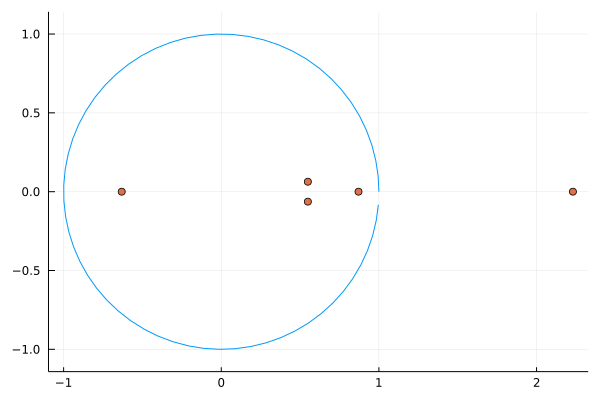

In [81]:
using Plots
plot(cos.(0:0.1:2π),sin.(0:0.1:2π)) #plot unit circle
scatter!(real.(ev),imag.(ev),legend=false,aspectratio=1)

In [82]:
using Random
Random.seed!(2)
Atemp = rand(5,5)
A = (Atemp + Atemp')/2 #symmetrizing a matrix

5×5 Matrix{Float64}:
 0.0116842  0.50867   0.724921  0.588727  0.724239
 0.50867    0.253821  0.308517  0.307698  0.381933
 0.724921   0.308517  0.697625  0.893887  0.734895
 0.588727   0.307698  0.893887  0.190111  0.473932
 0.724239   0.381933  0.734895  0.473932  0.0126723

In [83]:
ev = eigvals(A)

5-element Vector{Float64}:
 -0.7404535355307699
 -0.49854082979582043
 -0.3476716515832739
  0.1533512100263781
  2.5992288744922383

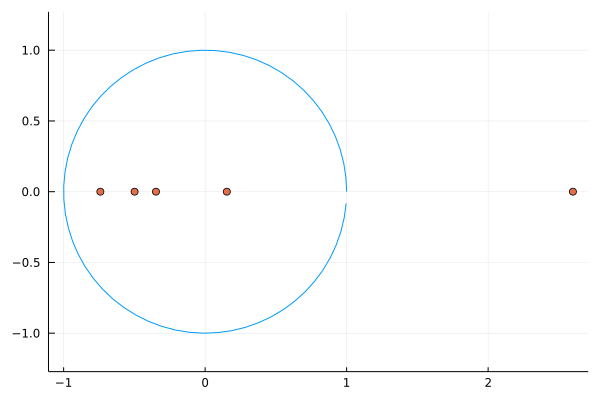

In [84]:
using Plots
plot(cos.(0:0.1:2π),sin.(0:0.1:2π)) #plot unit circle
scatter!(real.(ev),imag.(ev),legend=false,aspectratio=1)

In [85]:
M = eigvecs(A)

5×5 Matrix{Float64}:
 -0.740236    0.320608   0.347926  -0.183568   -0.441034
  0.104995   -0.255576  -0.362506  -0.838339   -0.299055
 -0.0987138  -0.659175  -0.111208   0.446035   -0.586882
  0.211833    0.620943  -0.560467   0.238527   -0.445576
  0.621618    0.108674   0.648881  -0.0874508  -0.416037

In [86]:
M*M' #shows you that M' is inverse of M

5×5 Matrix{Float64}:
  1.0           3.31544e-17  -1.51252e-16   2.33472e-16   6.11356e-17
  3.31544e-17   1.0           3.67802e-16   1.59892e-16  -1.2705e-16
 -1.51252e-16   3.67802e-16   1.0           3.50313e-16  -1.86392e-16
  2.33472e-16   1.59892e-16   3.50313e-16   1.0          -2.01033e-16
  6.11356e-17  -1.2705e-16   -1.86392e-16  -2.01033e-16   1.0

In [87]:
M' - inv(M)

5×5 Matrix{Float64}:
  0.0          -1.66533e-16   1.11022e-16  -1.38778e-16   0.0
  3.33067e-16   0.0           1.11022e-16   1.11022e-16   1.249e-16
 -1.11022e-16  -5.55112e-17  -4.996e-16    -4.44089e-16   3.33067e-16
 -8.32667e-17   4.44089e-16  -1.66533e-16   1.11022e-16  -8.32667e-17
 -1.11022e-16  -5.55112e-17  -1.11022e-16  -4.44089e-16   1.66533e-16

In [88]:
norm(M' - inv(M)) #matrix norm... 

1.1346735952787776e-15

**Claim:** For symmetric matrices:

1. The eigenvalues are real.
1. There exist an orthonormal set of eigenvectors.

Hence symmetric matrices are always diagonalizable (and much more)...

Hence for symmetric matrices,
$$
S = Q \Lambda Q^T = \sum_{i=1}^n \lambda_i q_i q_i^T
$$

In [89]:
using Random, Distributions
Random.seed!(0)
#generate synthetic data of length 3 from Multi-variate normal distribution
data = [ rand(MvNormal([10,0,20], [ 1 0.9 0.7;   
                                    0.9 1 0.4; 
                                    0.7 0.4 1]))    for _ in 1:10^4]

10000-element Vector{Vector{Float64}}:
 [10.201544718852745, 0.6321244311719922, 19.353119386498378]
 [11.185661210003731, 0.22743524804981985, 21.43348117246392]
 [10.021380770446681, 0.656438228772206, 19.618786938556124]
 [10.180946576751571, 0.8603443644159651, 19.45058818586665]
 [9.99168281716071, -0.04907582254032511, 19.482914969566693]
 [10.866175048443354, 0.5746439024640012, 20.460722904383108]
 [7.505707977609415, -1.5349750594456686, 16.900236689657238]
 [8.882453885771515, -0.8786976684278346, 19.043904437631667]
 [9.628034026152498, -0.07213776913827985, 20.03878966038566]
 [10.191785003154699, -0.18207601019629646, 20.92364195014032]
 [9.506887035890324, -0.8958337457844006, 21.240367266547153]
 [9.082954358684768, -1.2704008190679141, 19.270867012210765]
 [10.10149275111695, 0.039078467641679986, 20.27553480905556]
 ⋮
 [8.350954171681447, -1.4074850660627467, 18.970478498032104]
 [8.673931459886917, -0.5417246188798236, 18.01137382613477]
 [10.379077288855441, 0.018575

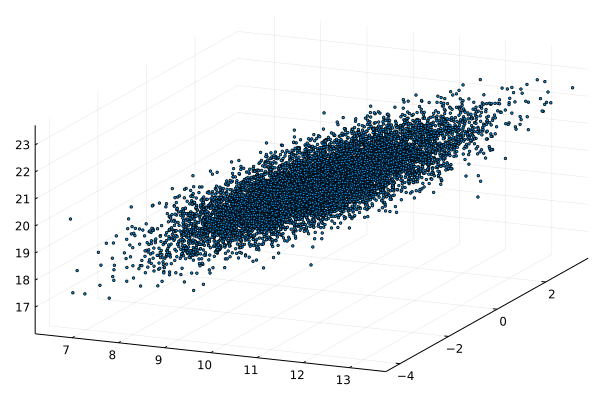

In [90]:
using Plots
scatter((x->x[1]).(data),(x->x[2]).(data),(x->x[3]).(data),legend=false,ms=1.5,camera=(30,50))

In [91]:
Σhat = cov(data) #compute the sample covariance from the data... \Sigma + [Tab]
#.... for data science this is sometimes where the story starts...

3×3 Matrix{Float64}:
 0.989948  0.885233  0.699469
 0.885233  0.982015  0.395282
 0.699469  0.395282  1.00882

In [92]:
ev = eigvals(Σhat) #always positive because postive definite

3-element Vector{Float64}:
 0.030909586635389945
 0.6180450049862666
 2.331825471377121

In [93]:
Q = eigvecs(Σhat) #before was M

3×3 Matrix{Float64}:
  0.756846  -0.118034  -0.642847
 -0.576245  -0.584638  -0.571087
 -0.308425   0.802662  -0.510497

In [94]:
Q*Q'

3×3 Matrix{Float64}:
  1.0          2.22045e-16  -1.11022e-16
  2.22045e-16  1.0           5.55112e-17
 -1.11022e-16  5.55112e-17   1.0

In [95]:
p = sortperm(ev,rev=true) #gives me order of eigenvalues by magnitude

3-element Vector{Int64}:
 3
 2
 1

In [96]:
sev = ev[p] #reshuffle eigenvalues
sQ = Q[:,p] #resuhuffle eigenvectors (both according to permuatation)
sev

3-element Vector{Float64}:
 2.331825471377121
 0.6180450049862666
 0.030909586635389945

In [97]:
approx1 = sev[1]*sQ[:,1]*sQ[:,1]' #rank 1 approximation

3×3 Matrix{Float64}:
 0.963632  0.856064  0.765238
 0.856064  0.760503  0.679817
 0.765238  0.679817  0.607691

In [98]:
rank(approx1)

1

In [99]:
Σhat

3×3 Matrix{Float64}:
 0.989948  0.885233  0.699469
 0.885233  0.982015  0.395282
 0.699469  0.395282  1.00882

In [100]:
norm(approx1-Σhat)

0.6188174454024753

In [101]:
approx2 = sev[1]*sQ[:,1]*sQ[:,1]' + sev[2]*sQ[:,2]*sQ[:,2]'

3×3 Matrix{Float64}:
 0.972242  0.898713  0.706684
 0.898713  0.971752  0.389789
 0.706684  0.389789  1.00588

In [102]:
norm(approx2-Σhat) #matrix norm

0.030909586635389917

In [103]:
approx3 = sev[1]*sQ[:,1]*sQ[:,1]' + sev[2]*sQ[:,2]*sQ[:,2]' + sev[3]*sQ[:,3]*sQ[:,3]' #exact

3×3 Matrix{Float64}:
 0.989948  0.885233  0.699469
 0.885233  0.982015  0.395282
 0.699469  0.395282  1.00882

In [104]:
norm(approx3-Σhat) #exact match

1.9922239907684116e-15

## Positive definite matrices

In [105]:
randS() = begin A = rand(-1:4,2,2); A+A' end
randS()

2×2 Matrix{Int64}:
 2  5
 5  6

$$
f(x,y) = a x^2 + by^2 + c xy
$$

$$
f(x) = x^T S x
$$

$$
f(x) = \sum_{i=1}^n \sum_{j=1}^n S_{ij} x_i x_j
$$

$$
f(x-b) = (x-b)^T S (x-b)
$$

$$
f([u,v]^T) = S_{11} u^2 + 2 S_{12} u v + s_{22} v^2
$$

In [106]:
f(x,y) = [x,y]'*S*[x,y] #+ A*[x,y] + c #quadartic form in two variables

f (generic function with 1 method)

In [107]:
S = randS()
S =[4 0;
    0 0]

2×2 Matrix{Int64}:
 4  0
 0  0

In [108]:
using LinearAlgebra
eigvals(S)

2-element Vector{Float64}:
 0.0
 4.0

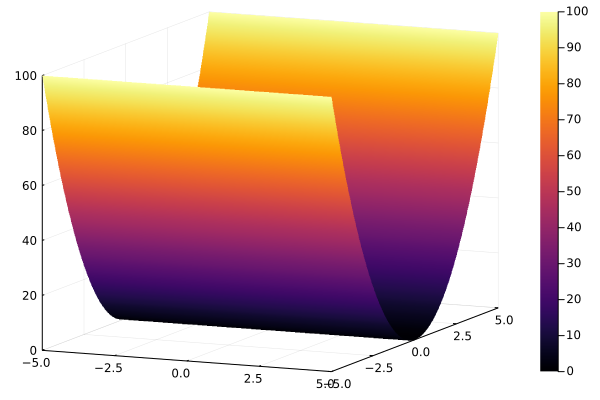

In [109]:
using Plots
grid = -5:0.1:5;
z = [f(x,y) for x in grid, y in grid]
surface(grid,grid,z)

**What is a positive definite matrix?**

Criterion 1 (eigenvalues) : All eigenvalues are positive.

Criterion 2 (energy): For any $x\neq 0$, $x^TSx > 0$.

Criterion 3 (Gram): $S= A^T A$ for matrix with independent columns.

Criterion 4 (Sylvester): All the leading determinants are positive.

Criterion 5 (elimination): All pivots are positive.

## Hessian

$$
f: {\mathbb R}^n \to {\mathbb R}
$$

$$
\mathbf{H} f=\left[\begin{array}{cccc}\frac{\partial^{2} f}{\partial x_{1}^{2}} & \frac{\partial^{2} f}{\partial x_{1} \partial x_{2}} & \cdots & \frac{\partial^{2} f}{\partial x_{1} \partial x_{n}} \\ \frac{\partial^{2} f}{\partial x_{2} \partial x_{1}} & \frac{\partial^{2} f}{\partial x_{2}^{2}} & \cdots & \frac{\partial^{2} f}{\partial x_{2} \partial x_{n}} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial^{2} f}{\partial x_{n} \partial x_{1}} & \frac{\partial^{2} f}{\partial x_{n} \partial x_{2}} & \cdots & \frac{\partial^{2} f}{\partial x_{n}^{2}}\end{array}\right],
$$

It is the Jacobian of the gradient.

$$
y=f(\mathbf{x}+\Delta \mathbf{x}) \approx f(\mathbf{x})+\nabla f(\mathbf{x}) \Delta \mathbf{x}+\frac{1}{2} 
\Delta \mathbf{x}^{\mathrm{T}} \mathbf{H}(\mathbf{x}) \Delta \mathbf{x}
$$


## Covariance


## Jordan Canonical Form

## Matrix Exponentials and differential equations